In [239]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
# Font size will be increased, background of figures will be white, grid will be present and size of plots will be increased

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

In [116]:
avocado_mean = pd.read_csv('avocado_mean.csv', index_col=0, parse_dates=['Date'])

## Task 1

In [117]:
'Max value is {:.3}'.format(avocado_mean.rolling(window=3).mean().AveragePrice.max())

'Max value is 1.85'

## Task 2

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


Graph B = 50, Graph D = 4, Graph C = ten, Graph A = 2


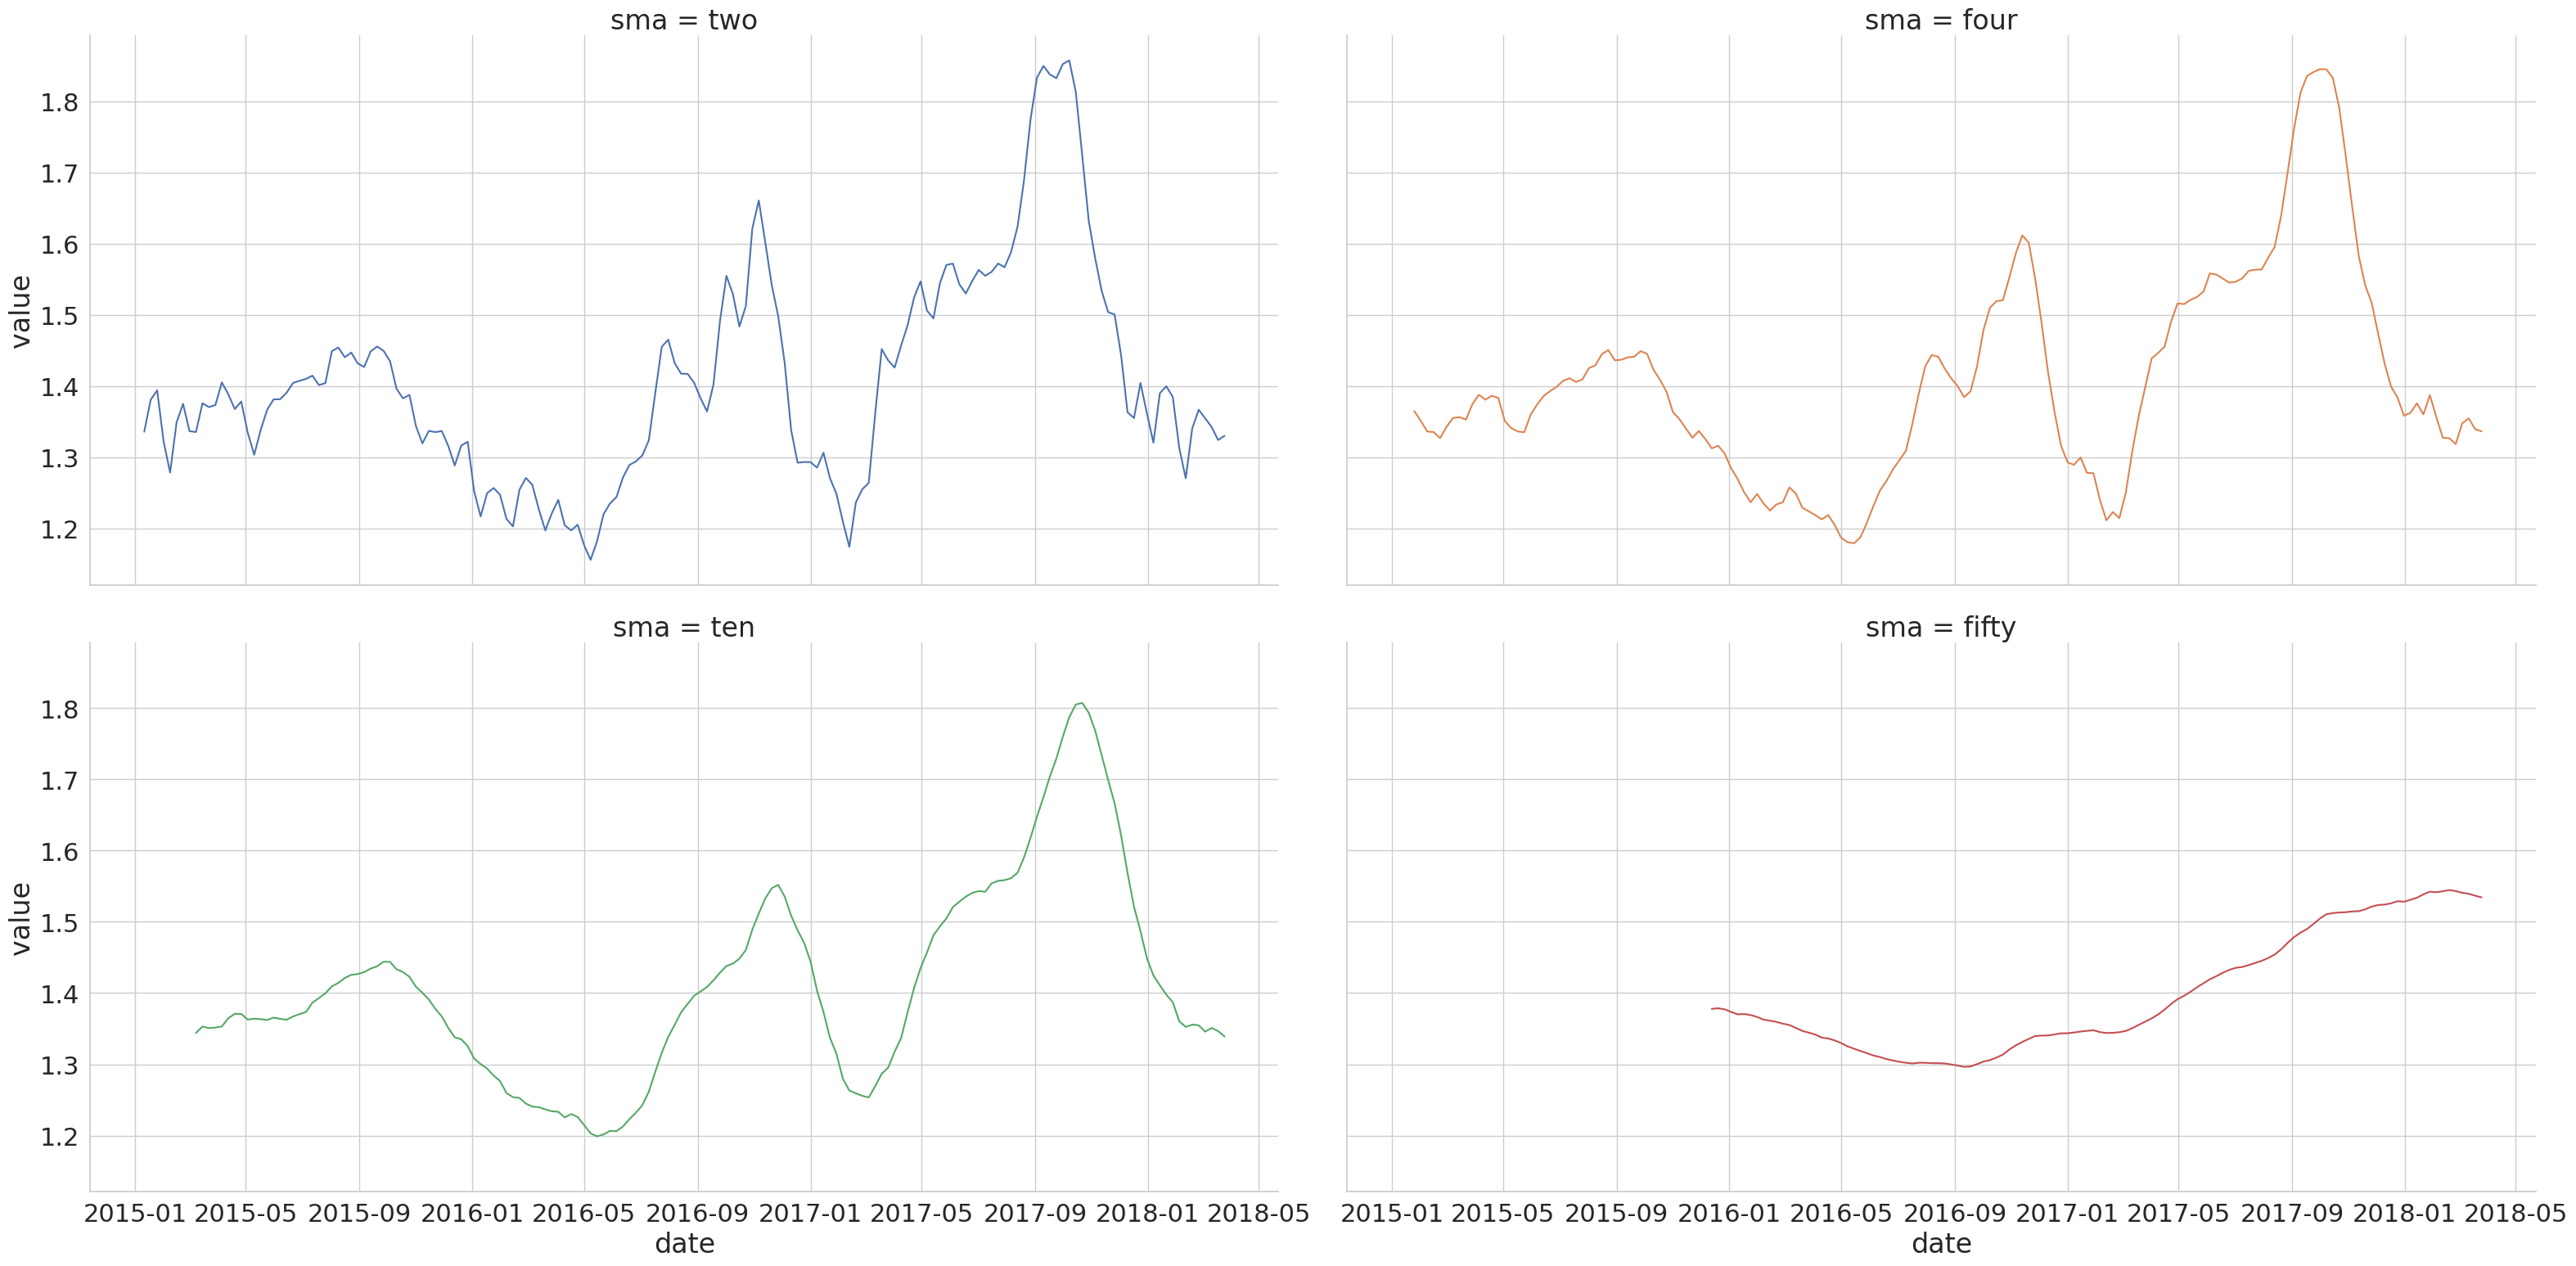

In [147]:
data_for_viz = (
    avocado_mean
    .assign(
        two   = avocado_mean.AveragePrice.rolling(window=2).mean(),
        four  = avocado_mean.AveragePrice.rolling(window=4).mean(),
        ten   = avocado_mean.AveragePrice.rolling(window=10).mean(),
        fifty = avocado_mean.AveragePrice.rolling(window=50).mean(),
    )
    [['two', 'four', 'ten', 'fifty']]
    .unstack()
    .reset_index()
    .rename(columns = {'level_0' : 'sma', 0 : 'value', 'Date' : 'date'})
)

g = sns.FacetGrid(data = data_for_viz, col="sma", hue='sma', height=8, aspect=2, sharex=True, col_wrap=2)
g.map(sns.lineplot, "date", "value")
print('Answer: Graph B = 50, Graph D = 4, Graph C = ten, Graph A = 2')

## Task 3

In [148]:
win_type    = 'Тип окна. Если None, то все наблюдения имеют равный вес.'
on          = 'Колонка, на основе которой считать скользящее окно, если не на основе индексов'
axis        = 'Ось (столбцы или строки)'
min_periods = '''Минимальное число наблюдений находящихся в окне необходимых для подсчета значения (если меньше - возвращается NA). 
               Значение по умолчанию равно размеру окна'''
center      = 'Позволяет использовать центрированное скользящее среднее'
closed      = '''Сделать интервал закрытым справа, слева, на обеих или ни на одной точке. 
                 По умолчанию используется значение "справа". Для фиксированных - "оба".'''
window      =  'Размер окна. Число наблюдений используемых для подсчета какой-либо статистики'

## Task 4

In [150]:
avocado_ewm = (
    avocado_mean
    .ewm(span=2)
    .mean()
)

## Task 5

In [156]:
avocado_full = pd.read_csv('avocado_full.csv', index_col=0)

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


(array([ 78.,  81.,  85.,  89.,  93.,  98., 102., 111.,  78.,  81.,  85.,
         89.,  93.,  98., 102., 111.]),
 [Text(78.0, 0, '2016-07-03'),
  Text(81.0, 0, '2016-07-24'),
  Text(85.0, 0, '2016-08-21'),
  Text(89.0, 0, '2016-09-18'),
  Text(93.0, 0, '2016-10-16'),
  Text(98.0, 0, '2016-11-20'),
  Text(102.0, 0, '2016-12-18'),
  Text(111.0, 0, '2017-02-19'),
  Text(78.0, 0, '2016-07-03'),
  Text(81.0, 0, '2016-07-24'),
  Text(85.0, 0, '2016-08-21'),
  Text(89.0, 0, '2016-09-18'),
  Text(93.0, 0, '2016-10-16'),
  Text(98.0, 0, '2016-11-20'),
  Text(102.0, 0, '2016-12-18'),
  Text(111.0, 0, '2017-02-19')])

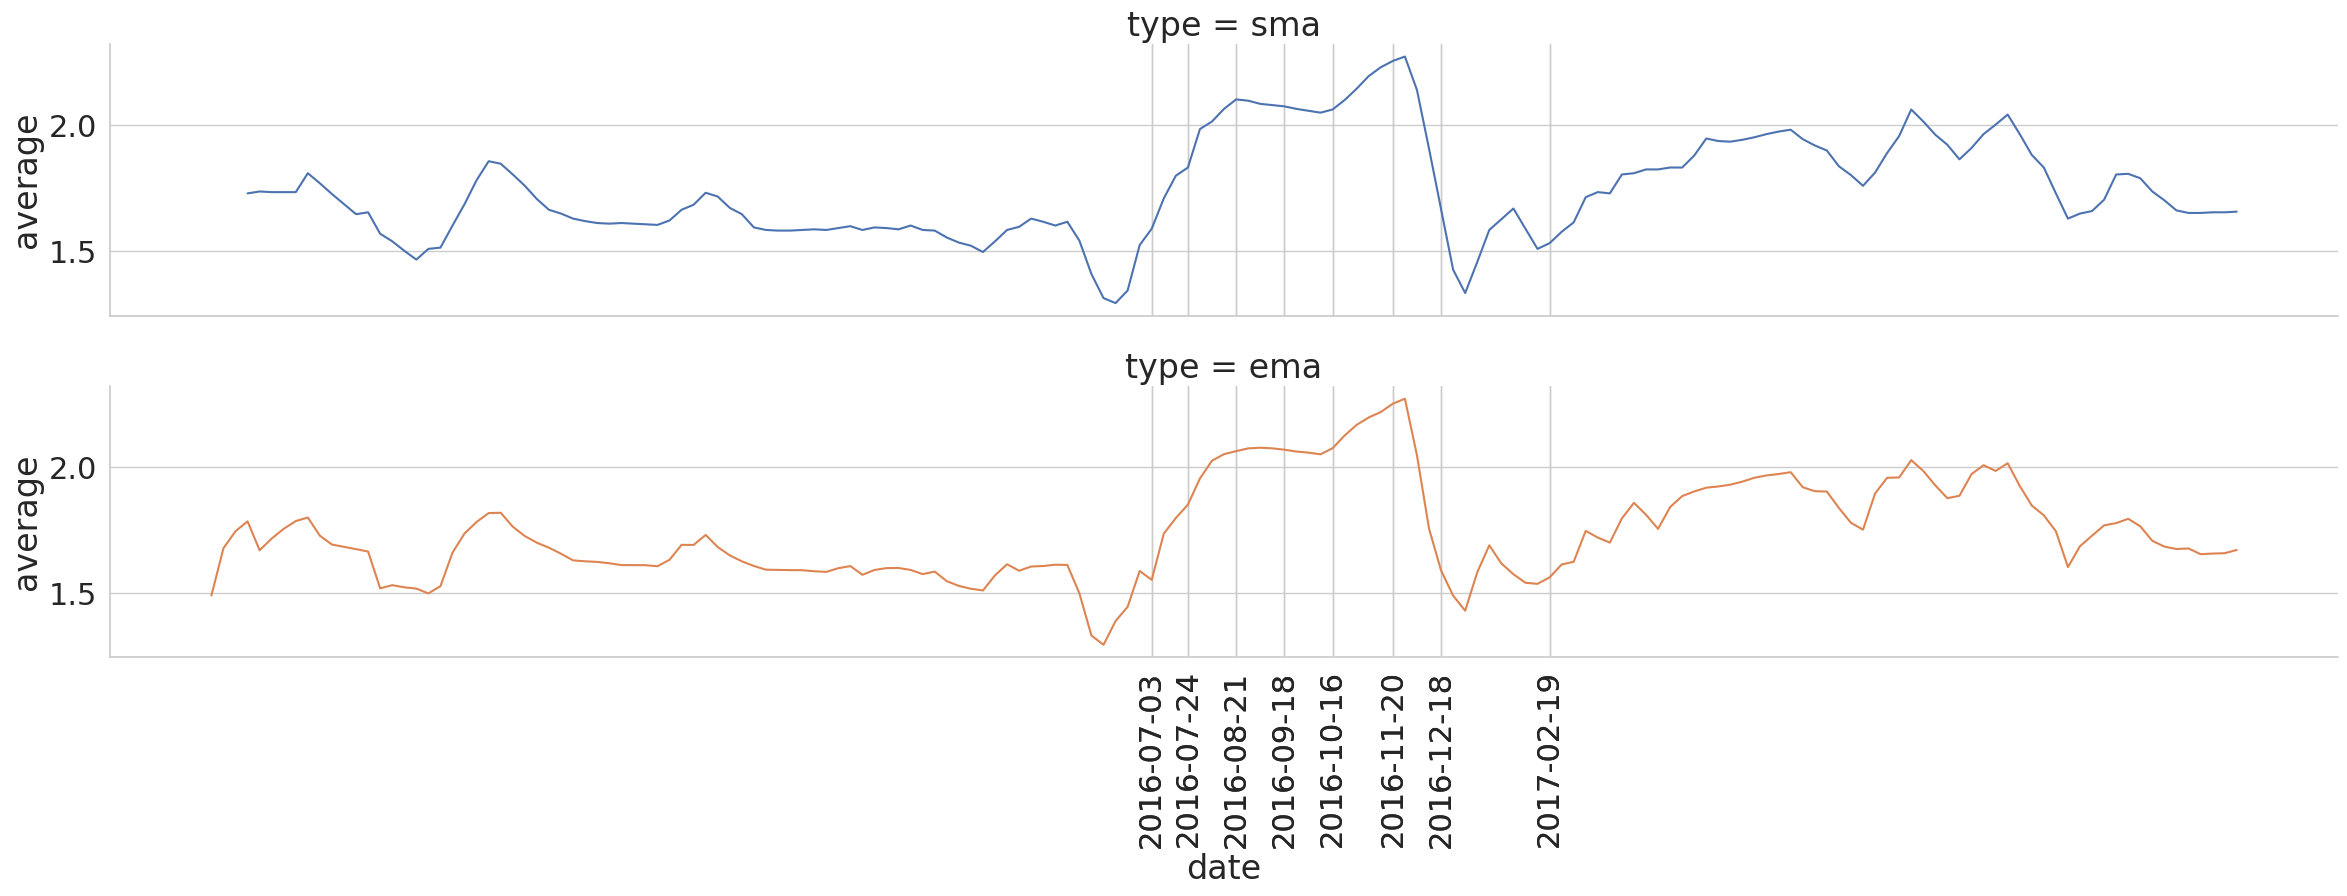

In [254]:
avocado_filter = avocado_full.query("type == 'organic' and region == 'Chicago'")
filter_for_fiz = (
    avocado_filter
    .assign(sma = avocado_filter.AveragePrice.rolling(window=4).mean(),
            ema = avocado_filter.AveragePrice.ewm(span=4).mean())
    [['sma', 'ema']]
    .unstack()
    .reset_index()
    .rename(columns = {'level_0' : 'type', 'Date' : 'date', 0 : 'average'})
)
g = sns.FacetGrid(data = filter_for_fiz, row='type', hue='type', height=4, aspect=6, sharex=True)
g.map(sns.lineplot, "date", "average")
g.set(xticks=filter_for_fiz.loc[filter_for_fiz['date'].isin(['2016-07-03', '2016-07-24', '2016-08-21', 
                                                             '2016-09-18', '2016-10-16', '2016-11-20', 
                                                             '2016-12-18', '2017-02-19'])].date)
plt.xticks(rotation=90)

In [256]:
# answer 
# 1 - ema 
# 2 - 2.102500
# 3 - more
# 4 - 1.561849
# 5 - more
# 6 - 1.532500

## Task 6

In [258]:
df = pd.read_csv('delays.csv')

In [268]:
df['delay'] = pd.to_timedelta(df.delay.str.replace('-', ''))

## Task 7

In [272]:
df['delay_categorical'] = pd.cut(df.delay, 3)

## Task 8
'less than 1 day' – время от 0 до 1 дня
'1-2 days' – от 1 до 2 дней
'2-3 days' – от 2 до 3 дней
 'more than 3 days' – больше 3 дней

In [317]:
df['delay_categorical'] = pd.cut(df.delay, 
                                 pd.to_timedelta([0,1,2,3,5], unit='D'), 
                                 labels=['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days'])

<AxesSubplot: xlabel='delay_categorical'>

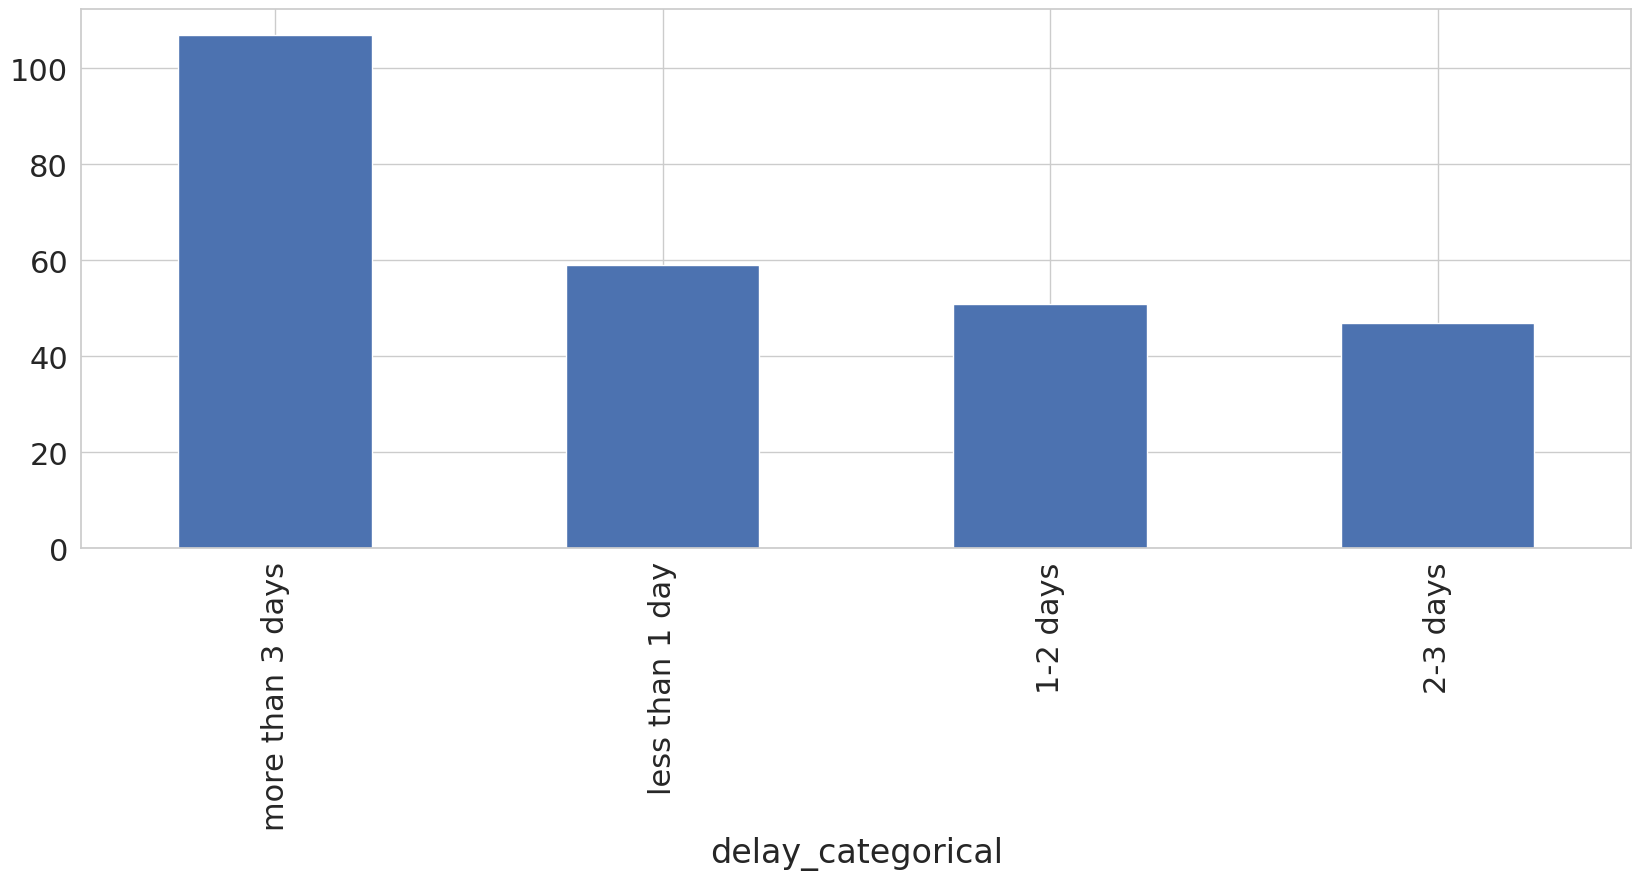

In [327]:
(
    df
    .value_counts('delay_categorical')
    .plot.bar()
)

#df.plot.bar(x='lab', y='val', rot=0)